## **Part 1 Exercise - Satellite Imagery Data Preparation**

In [2]:
!pip install patchify
!pip install opencv-python
!pip install tenserflow
!pip install tensorflowmo

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow
ERROR: Could not find a version that satisfies the requirement tensorflowmo (from versions: none)
ERROR: No matching distribution found for tensorflowmo


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Listing All The Images From The Dataset

import os

base_path = "/content/drive/MyDrive/Semantic segmentation dataset"

# Loop through each tile folder (tile1 to tile8)
for tile_folder in sorted(os.listdir(base_path)):
    tile_path = os.path.join(base_path, tile_folder)
    images_path = os.path.join(tile_path, "images")

    # Skip if not a folder or if 'images' folder doesn't exist
    if not os.path.isdir(images_path):
        continue

    print(f"\n📁 {tile_folder}/images:")

    # List images in the images folder
    image_files = sorted(os.listdir(images_path))
    for image in image_files:
        print(f"   📄 {image}")



📁 Tile 1/images:
   📄 image_part_001.jpg
   📄 image_part_002.jpg
   📄 image_part_003.jpg
   📄 image_part_004.jpg
   📄 image_part_005.jpg
   📄 image_part_006.jpg
   📄 image_part_007.jpg
   📄 image_part_008.jpg
   📄 image_part_009.jpg

📁 Tile 2/images:
   📄 image_part_001.jpg
   📄 image_part_002.jpg
   📄 image_part_003.jpg
   📄 image_part_004.jpg
   📄 image_part_005.jpg
   📄 image_part_006.jpg
   📄 image_part_007.jpg
   📄 image_part_008.jpg
   📄 image_part_009.jpg

📁 Tile 3/images:
   📄 image_part_001.jpg
   📄 image_part_002.jpg
   📄 image_part_003.jpg
   📄 image_part_004.jpg
   📄 image_part_005.jpg
   📄 image_part_006.jpg
   📄 image_part_007.jpg
   📄 image_part_008.jpg
   📄 image_part_009.jpg

📁 Tile 4/images:
   📄 image_part_001.jpg
   📄 image_part_002.jpg
   📄 image_part_003.jpg
   📄 image_part_004.jpg
   📄 image_part_005.jpg
   📄 image_part_006.jpg
   📄 image_part_007.jpg
   📄 image_part_008.jpg
   📄 image_part_009.jpg

📁 Tile 5/images:
   📄 image_part_001.jpg
   📄 image_part_002.jp

In [5]:
from patchify import patchify
from PIL import Image
import numpy as np
import cv2
import os
from sklearn.preprocessing import MinMaxScaler

# Parameters
dataset_root_folder = "/content/drive/MyDrive"
dataset_name = "Semantic segmentation dataset"
image_patch_size = 256

# Scaler for images only
minmaxscaler = MinMaxScaler()

# Output lists
image_dataset = []
mask_dataset = []

# Loop through tiles and image IDs
for tile_id in range(1, 5):  # Tile 1 to Tile 8
    for image_id in range(1, 10):  # Image 001 to 009

        # --- Process Image ---
        image_path = f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.jpg'
        image = cv2.imread(image_path, 1)

        if image is not None:
            size_x = (image.shape[1] // image_patch_size) * image_patch_size
            size_y = (image.shape[0] // image_patch_size) * image_patch_size

            image = Image.fromarray(image)
            image = image.crop((0, 0, size_x, size_y))
            image = np.array(image)

            image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
            print(f"\n📁 Tile {tile_id} - Image {image_id}: Total patches = {image_patches.shape[0] * image_patches.shape[1]}")

            for i in range(image_patches.shape[0]):
                for j in range(image_patches.shape[1]):
                    individual_patched_image = image_patches[i, j, :, :, :][0]
                    individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, 3)).reshape(individual_patched_image.shape)
                    image_dataset.append(individual_patched_image)
                    print(f"🖼️ Image Patch ({i},{j}) shape: {individual_patched_image.shape}")

        # --- Process Mask ---
        mask_path = f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/masks/image_part_00{image_id}.png'
        mask = cv2.imread(mask_path, 1)

        if mask is not None:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            size_x = (mask.shape[1] // image_patch_size) * image_patch_size
            size_y = (mask.shape[0] // image_patch_size) * image_patch_size

            mask = Image.fromarray(mask)
            mask = mask.crop((0, 0, size_x, size_y))
            mask = np.array(mask)

            mask_patches = patchify(mask, (image_patch_size, image_patch_size, 3), step=image_patch_size)
            print(f"🩸 Mask Patches: {mask_patches.shape[0] * mask_patches.shape[1]}")

            for i in range(mask_patches.shape[0]):
                for j in range(mask_patches.shape[1]):
                    individual_patched_mask = mask_patches[i, j, :, :, :][0]
                    mask_dataset.append(individual_patched_mask)



📁 Tile 1 - Image 1: Total patches = 6
🖼️ Image Patch (0,0) shape: (256, 256, 3)
🖼️ Image Patch (0,1) shape: (256, 256, 3)
🖼️ Image Patch (0,2) shape: (256, 256, 3)
🖼️ Image Patch (1,0) shape: (256, 256, 3)
🖼️ Image Patch (1,1) shape: (256, 256, 3)
🖼️ Image Patch (1,2) shape: (256, 256, 3)
🩸 Mask Patches: 6

📁 Tile 1 - Image 2: Total patches = 6
🖼️ Image Patch (0,0) shape: (256, 256, 3)
🖼️ Image Patch (0,1) shape: (256, 256, 3)
🖼️ Image Patch (0,2) shape: (256, 256, 3)
🖼️ Image Patch (1,0) shape: (256, 256, 3)
🖼️ Image Patch (1,1) shape: (256, 256, 3)
🖼️ Image Patch (1,2) shape: (256, 256, 3)
🩸 Mask Patches: 6

📁 Tile 1 - Image 3: Total patches = 6
🖼️ Image Patch (0,0) shape: (256, 256, 3)
🖼️ Image Patch (0,1) shape: (256, 256, 3)
🖼️ Image Patch (0,2) shape: (256, 256, 3)
🖼️ Image Patch (1,0) shape: (256, 256, 3)
🖼️ Image Patch (1,1) shape: (256, 256, 3)
🖼️ Image Patch (1,2) shape: (256, 256, 3)
🩸 Mask Patches: 6

📁 Tile 1 - Image 4: Total patches = 6
🖼️ Image Patch (0,0) shape: (256, 

In [6]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [7]:
print(len(image_dataset))
print(len(mask_dataset))

216
216


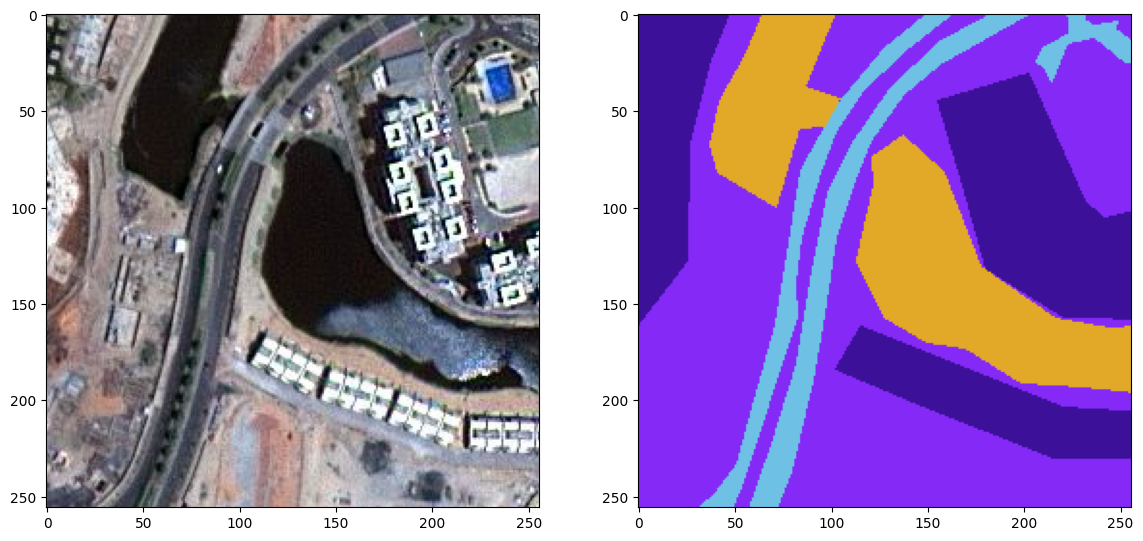

In [8]:
from matplotlib import pyplot as plt
import random

random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [9]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [10]:
label = individual_patched_mask

In [11]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape[:2], dtype=np.uint8)  # Only height × width
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    return label_segment  # shape: (256, 256)


In [12]:
# Convert mask_dataset (list of RGB masks) to numpy array
mask_dataset = np.array(mask_dataset)

# Convert RGB masks to label masks
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])  # shape: (256, 256)
    labels.append(label)

# Convert list of label masks to array
labels = np.array(labels)  # shape: (N, 256, 256)

# Expand dims for categorical conversion (if using to_categorical)
labels = np.expand_dims(labels, axis=-1)  # shape: (N, 256, 256, 1)


In [13]:

labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [14]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [15]:
np.array([0, 1, 2, 3, 4, 5], dtype=np.uint8)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [16]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


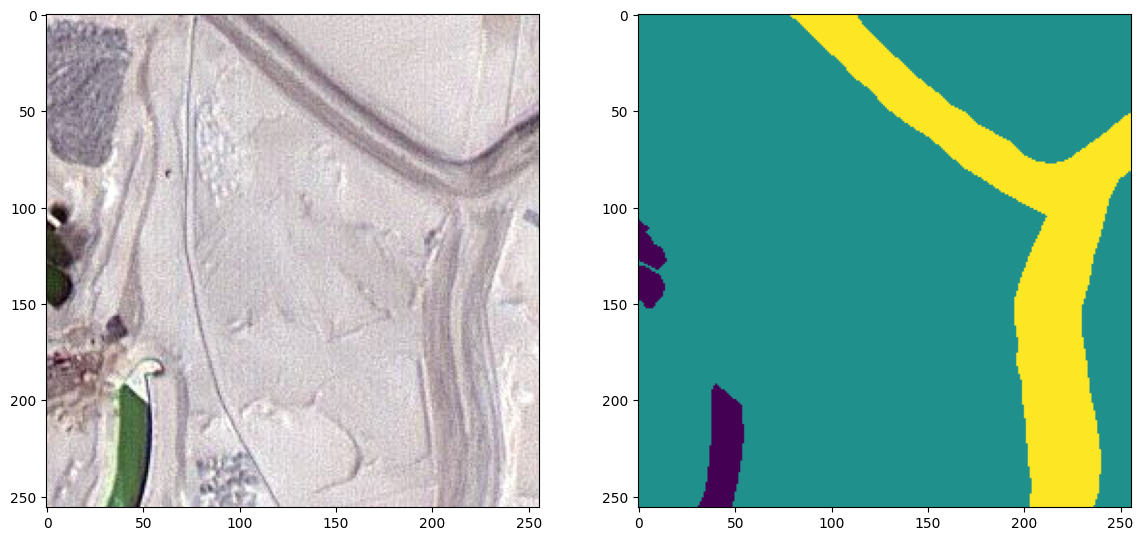

In [17]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [18]:
total_classes = len(np.unique(labels))


total_classes

6

In [19]:


from tensorflow.keras.utils import to_categorical


labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)


master_trianing_dataset = image_dataset


from sklearn.model_selection import train_test_split

In [20]:
labels = np.squeeze(labels, axis=-1)
labels_categorical_dataset = to_categorical(labels, num_classes=6)

X_train, X_test, y_train, y_test = train_test_split(
    np.array(image_dataset),
    labels_categorical_dataset,
    test_size=0.15,
    random_state=100
)

print(X_train.shape)  # (something, 256, 256, 3)
print(y_train.shape)  # (something, 256, 256, 6)


(183, 256, 256, 3)
(183, 256, 256, 6)


In [21]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(183, 256, 256, 3)
(33, 256, 256, 3)
(183, 256, 256, 6)
(33, 256, 256, 6)


In [22]:

image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [23]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# **Part 2: Deep Learning with Satellite Imagery Data**

In [24]:
# Install the latest version of the segmentation-models library for advanced prebuilt architectures like U-Net, FPN, etc.

!pip install -U segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.5 MB/s eta 0:00:00


In [25]:
# Import core Keras model class and layers used for building the U-Net architecture

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [26]:
# Define custom Jaccard coefficient metric for semantic segmentation evaluation

import tensorflow as tf
from tensorflow.keras import backend as K

def jaccard_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)


In [27]:
# @title
# Define U-Net model architecture for multi-class semantic segmentation

def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [28]:
# Specify evaluation metrics: accuracy and custom Jaccard coefficient

metrics = ["accuracy", jaccard_coef]

In [29]:
# Print input image dimensions and number of classes to confirm data setup

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [30]:
# Create a wrapper function to initialize the U-Net model with given input parameters

def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [31]:
# Initialize the U-Net model using predefined parameters

model = get_deep_learning_model()

In [32]:
# To view full model configuration as a dictionary

# model.get_config()

Generating Loss Function

*   dice loss > Focal Loss > Total Loss
*   Total Loss = (Dice loss + (1*Focal Loss))


In [33]:
# Define class weights for each of the 6 segmentation classes (must sum close to 1.0)

weights = np.array([1, 1, 1, 1, 1, 1])

In [34]:
# Import the segmentation_models library which provides advanced pre-built models and loss functions

import keras
import tensorflow as tf

# Patch keras.utils.generic_utils for compatibility
import keras.utils
import tensorflow.keras.utils

keras.utils.generic_utils = tf.keras.utils

# Now safely import segmentation_models
import segmentation_models as sm

# Set up framework (Keras backend)
sm.set_framework('tf.keras')
sm.framework()


Segmentation Models: using `keras` framework.


'tf.keras'

In [35]:
# Initialize the Dice loss with class-specific weights to handle class imbalance

dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [36]:
# Initialize the categorical focal loss to give more importance to hard-to-classify pixels

focal_loss = sm.losses.CategoricalFocalLoss()

In [37]:
# Combine Dice loss and Focal loss into a single total loss function for model training

total_loss = dice_loss + (1 * focal_loss)

In [38]:
import tensorflow as tf


tf.keras.backend.clear_session()



model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [39]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [41]:
print("X_train:", X_train.shape, type(X_train))
print("y_train:", y_train.shape, type(y_train))
print("X_test:", X_test.shape, type(X_test))
print("y_test:", y_test.shape, type(y_test))


X_train: (183, 256, 256, 3) <class 'numpy.ndarray'>
y_train: (183, 256, 256, 6) <class 'numpy.ndarray'>
X_test: (33, 256, 256, 3) <class 'numpy.ndarray'>
y_test: (33, 256, 256, 6) <class 'numpy.ndarray'>


In [46]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',     # Kis cheez ko monitor karna hai (val_accuracy bhi ho sakta hai)
    patience=3,             # Kitne epochs tak wait kare agar improvement na ho
    restore_best_weights=True  # Best model weights wapas le aaye
)
tf.config.run_functions_eagerly(True)

In [47]:
model_history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=30,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(8, 256, 256, 3))
  warnings.warn(msg)


22/23 ━━━━━━━━━━━━━━━━━━━━ 6s 7s/step - accuracy: 0.3043 - jaccard_coef: 0.1431 - loss: 0.8942 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(7, 256, 256, 3))
  warnings.warn(msg)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3070 - jaccard_coef: 0.1446 - loss: 0.8931

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


23/23 ━━━━━━━━━━━━━━━━━━━━ 165s 7s/step - accuracy: 0.3096 - jaccard_coef: 0.1461 - loss: 0.8921 - val_accuracy: 0.3922 - val_jaccard_coef: 0.2041 - val_loss: 0.8543
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 190s 7s/step - accuracy: 0.4957 - jaccard_coef: 0.2648 - loss: 0.8043 - val_accuracy: 0.4850 - val_jaccard_coef: 0.2690 - val_loss: 0.7892
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 154s 7s/step - accuracy: 0.5934 - jaccard_coef: 0.3693 - loss: 0.7085 - val_accuracy: 0.4866 - val_jaccard_coef: 0.2746 - val_loss: 0.7880
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.5908 - jaccard_coef: 0.3726 - loss: 0.7252 - val_accuracy: 0.5427 - val_jaccard_coef: 0.2974 - val_loss: 0.7411
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.6416 - jaccard_coef: 0.4353 - loss: 0.6629 - val_accuracy: 0.5320 - val_jaccard_coef: 0.2858 - val_loss: 0.7428
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.6794 - jaccard_coef: 0.4575 - loss: 0.6344 - val_accuracy: 0.

In [48]:
# Store training history in a consistent variable name for later use

history_a = model_history
history_a.history

{'accuracy': [0.3680964410305023,
  0.5276741981506348,
  0.6048652529716492,
  0.5971275568008423,
  0.6429994702339172,
  0.683089017868042,
  0.6971377730369568,
  0.6769536733627319,
  0.6973617076873779,
  0.7119772434234619,
  0.6922299861907959,
  0.7108831405639648,
  0.723082423210144,
  0.7315768599510193,
  0.73479163646698,
  0.7487417459487915,
  0.7561643719673157,
  0.766520082950592,
  0.7704804539680481,
  0.7709471583366394,
  0.7866610288619995,
  0.7854534983634949,
  0.792365312576294,
  0.7943432331085205,
  0.7909690141677856,
  0.8030926585197449,
  0.7978581786155701,
  0.8023890256881714,
  0.8022803664207458,
  0.8040258884429932],
 'jaccard_coef': [0.17922158539295197,
  0.29708412289619446,
  0.38978174328804016,
  0.3751186430454254,
  0.43709999322891235,
  0.4641202390193939,
  0.48614302277565,
  0.4602101445198059,
  0.47976723313331604,
  0.5083027482032776,
  0.4999883770942688,
  0.5212150812149048,
  0.5391673445701599,
  0.5494147539138794,
  0.55

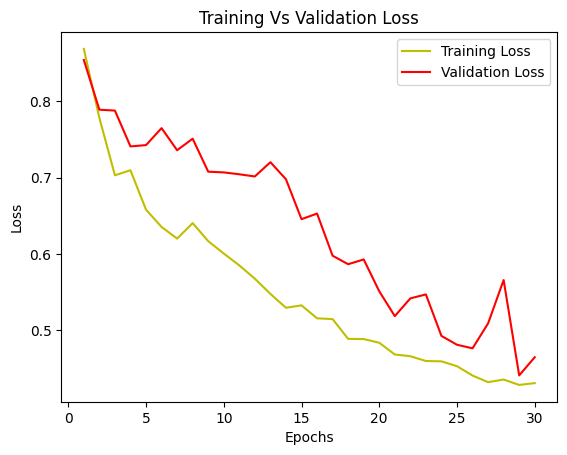

In [49]:
# Get training loss and validation loss history from model

loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

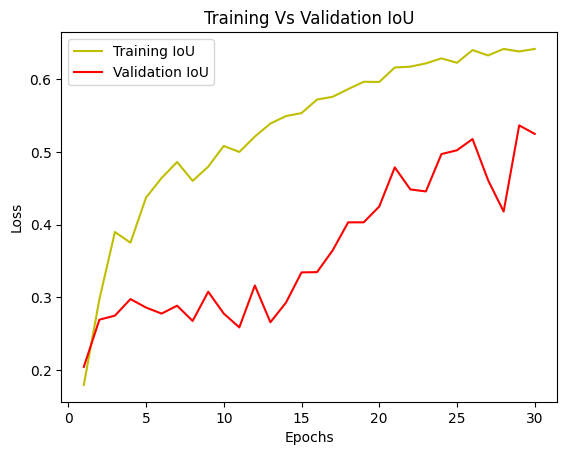

In [50]:
# Get training and validation IoU (Intersection over Union) values

jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [51]:
# Run model prediction on full test set

model_history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 23}

In [52]:
# Run model prediction on full test set

y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step


In [53]:
len(y_pred)

33

In [54]:
# Show raw prediction output (softmax probability maps) before argmax

y_pred

array([[[[8.59788526e-03, 7.91659713e-01, 8.70787054e-02,
          1.85654946e-02, 3.49030569e-02, 5.91952503e-02],
         [9.98902251e-04, 9.55655038e-01, 1.34692695e-02,
          4.52229101e-03, 4.28269524e-03, 2.10719071e-02],
         [3.98306700e-04, 9.68566835e-01, 7.80796632e-03,
          3.36535228e-03, 1.53530971e-03, 1.83261409e-02],
         ...,
         [1.26094383e-04, 9.77474809e-01, 3.94288776e-03,
          2.08343752e-03, 2.53365550e-04, 1.61193069e-02],
         [6.51912473e-04, 9.32027519e-01, 9.94169712e-03,
          1.05890241e-02, 6.98925927e-04, 4.60910536e-02],
         [6.42008102e-03, 8.24574947e-01, 4.10513803e-02,
          2.70188954e-02, 1.09882839e-02, 8.99463743e-02]],

        [[1.01330981e-03, 9.02320743e-01, 3.22691724e-02,
          1.34315761e-02, 3.30711668e-03, 4.76582125e-02],
         [1.32664854e-05, 9.92950439e-01, 1.73829019e-03,
          6.68768538e-04, 1.55739981e-04, 4.47337190e-03],
         [3.68015230e-06, 9.94250357e-01, 8.4261

In [55]:
# Convert one-hot encoded y_test masks to class index masks (H x W)

y_pred_argmax = np.argmax(y_pred, axis=3)

In [56]:
len(y_pred_argmax)

33

In [57]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       [[3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [58]:
# Convert predicted softmax outputs to class index masks

y_test_argmax = np.argmax(y_test, axis=3)


y_test_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [3, 3, 3, ..., 1, 2, 2],
        [3, 3, 3, ..., 1, 2, 2],
        [3, 3, 3, ..., 2, 2, 2]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       ...,

       [[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 

# Comparing prediction results using test images using mask images and predicted result images..

In [60]:
# Import the random module for selecting a random image from test data and make prediction

import random



test_image_number = random.randint(0, len(X_test)-1)

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


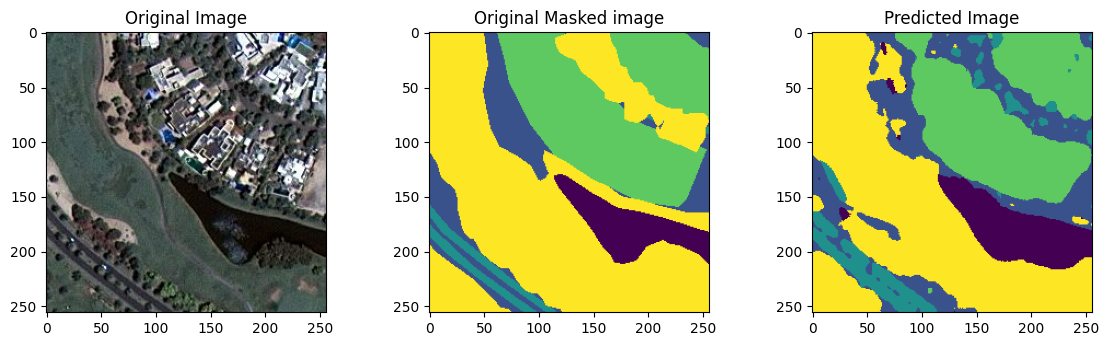

In [61]:
# Show the predicted img , mask and orignal img

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [62]:
model.save("Semantic_Segmentation_Of_Aerial_Imagery_UNET.h5")

In [64]:
from google.colab import files
files.download("Semantic_Segmentation_Of_Aerial_Imagery_UNET.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

# Save to Drive
model.save('/content/drive/MyDrive/Semantic_Segmentation_Of_Aerial_Imagery_UNET.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Jun 18 14:48 .
drwxr-xr-x 1 root root 4.0K Jun 18 13:04 ..
drwxr-xr-x 4 root root 4.0K Jun 16 13:32 .config
drwx------ 6 root root 4.0K Jun 18 13:10 drive
drwxr-xr-x 1 root root 4.0K Jun 16 13:32 sample_data
-rw-r--r-- 1 root root  23M Jun 18 14:48 Semantic_Segmentation_Of_Aerial_Imagery_UNET.h5
